## TDE

In [ ]:
file_path = 'logs/results_tde.csv'  # Replace with the path to your CSV file


In [24]:
import pandas as pd

# Read the entire CSV file
df = pd.read_csv('logs/results_tde.csv', header=None)

# Initialize an empty dictionary to store results
results = {}

# Iterate over the rows to identify table prefixes and process data
current_prefix = None
metrics = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score']
for index, row in df.iterrows():
    # Check if the row is a new table prefix
    if pd.notna(row[0]) and row[0].startswith('_'):
        current_prefix = row[0]
        results[current_prefix] = {}
        continue
    
    # Skip empty rows
    if pd.isna(row[0]):
        continue
    
    if row[0] == 'mean':
        results[current_prefix]['means'] = row[1:].values
    elif row[0] == 'std':
        results[current_prefix]['stds'] = row[1:].values
    elif row[0].startswith('t_interval'):
        if 't_intervals' not in results[current_prefix]:
            results[current_prefix]['t_intervals'] = {}
        t_index = row[0]
        results[current_prefix]['t_intervals'][t_index] = row[1:].values

# Convert results to the desired format
for prefix, data in results.items():
    print(f"Prefix: {prefix}")
    print(f"Metrics: {metrics}")
    print(f"Means: {data.get('means')}")
    print(f"Stds: {data.get('stds')}")
    for t_index, t_values in data.get('t_intervals', {}).items():
        print(f"{t_index}: {t_values}")
    print()

# Save or use the results dictionary as needed


Prefix: _0_0
Metrics: ['accuracy_score', 'f1_score', 'precision_score', 'recall_score']
Means: ['0.7119266' '0.7134916' '0.7264055' '0.7119266']
Stds: ['0.0269669' '0.0322835' '0.0374371' '0.0269669']
t_interval_0: ['0.6370546002945039' '0.6238583400591337' '0.6224634827998949'
 '0.6370546002945039']
t_interval_1: ['0.7867986107146705' '0.8031248097808793' '0.8303475276952565'
 '0.7867986107146705']

Prefix: _0_1
Metrics: ['accuracy_score', 'f1_score', 'precision_score', 'recall_score']
Means: ['0.7119266' '0.7113906' '0.7230868' '0.7119266']
Stds: ['0.040032' '0.0435342' '0.0402855' '0.040032']
t_interval_0: ['0.6007800353956249' '0.5905203944313743' '0.6112363011761203'
 '0.6007800353956249']
t_interval_1: ['0.8230731756135495' '0.8322608646678215' '0.8349373608268514'
 '0.8230731756135495']

Prefix: _0_2
Metrics: ['accuracy_score', 'f1_score', 'precision_score', 'recall_score']
Means: ['0.7247706' '0.726047' '0.7362908' '0.7247706']
Stds: ['0.0259489' '0.0270227' '0.0252359' '0.0259

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


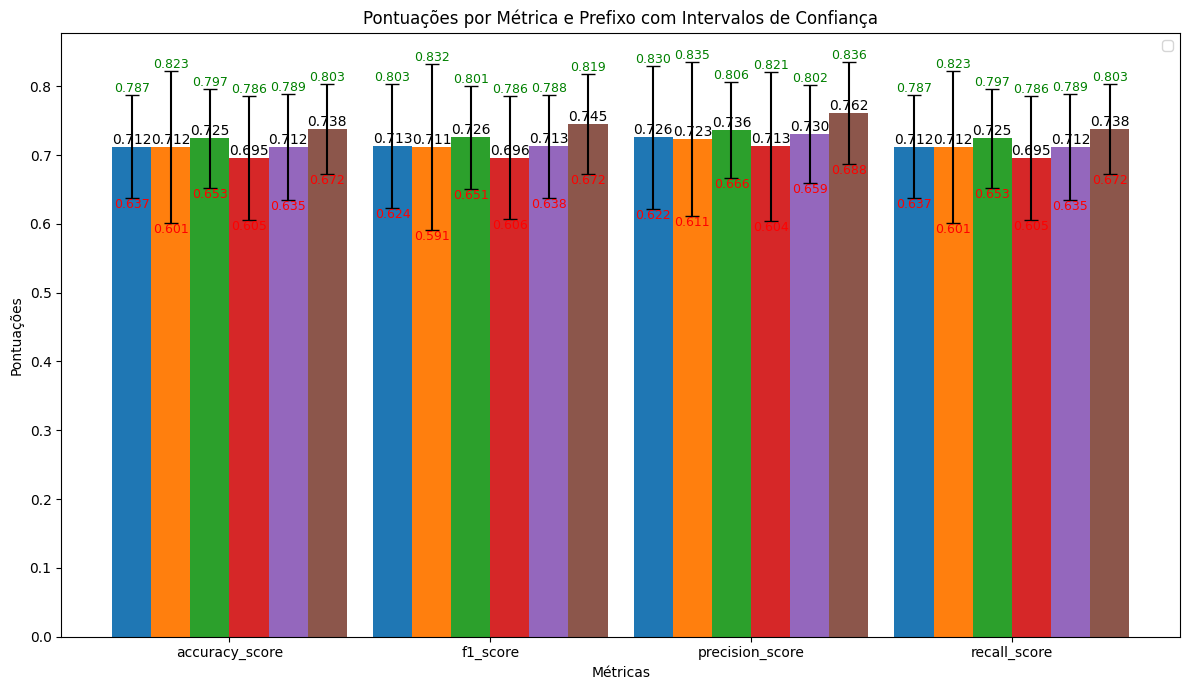

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Dados processados diretamente da sua entrada
results = {
    '_0_0': {
        'means': [0.7119266, 0.7134916, 0.7264055, 0.7119266],
        't_intervals': {
            't_interval_0': [0.6370546, 0.62385834, 0.62246348, 0.6370546],
            't_interval_1': [0.78679861, 0.80312481, 0.83034753, 0.78679861]
        }
    },
    '_0_1': {
        'means': [0.7119266, 0.7113906, 0.7230868, 0.7119266],
        't_intervals': {
            't_interval_0': [0.60078004, 0.59052039, 0.6112363, 0.60078004],
            't_interval_1': [0.82307318, 0.83226086, 0.83493736, 0.82307318]
        }
    },
    '_0_2': {
        'means': [0.7247706, 0.726047, 0.7362908, 0.7247706],
        't_intervals': {
            't_interval_0': [0.65272502, 0.65102003, 0.66622457, 0.65272502],
            't_interval_1': [0.79681626, 0.8010739, 0.80635702, 0.79681626]
        }
    },
    '_1_0': {
        'means': [0.6954128, 0.6964603, 0.7127521, 0.6954128],
        't_intervals': {
            't_interval_0': [0.60513994, 0.60647433, 0.60434808, 0.60513994],
            't_interval_1': [0.78568575, 0.78644618, 0.8211561, 0.78568575]
        }
    },
    '_1_2': {
        'means': [0.7119266, 0.7132333, 0.7304289, 0.7119266],
        't_intervals': {
            't_interval_0': [0.63534106, 0.63839234, 0.65909483, 0.63534106],
            't_interval_1': [0.78851215, 0.78807434, 0.80176301, 0.78851215]
        }
    },
    '_1_4': {
        'means': [0.7376147, 0.7454999, 0.7618923, 0.7376147],
        't_intervals': {
            't_interval_0': [0.67197799, 0.67235081, 0.68768788, 0.67197799],
            't_interval_1': [0.80325136, 0.81864905, 0.83609665, 0.80325136]
        }
    }
}

metrics = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score']
width = 0.15  # Largura das barras
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 7))

# Iterar sobre os resultados para plotar cada prefixo
for i, (prefix, values) in enumerate(results.items()):
    means = np.array(values['means'], dtype=np.float64)
    t_interval_0 = np.array(values['t_intervals']['t_interval_0'], dtype=np.float64)
    t_interval_1 = np.array(values['t_intervals']['t_interval_1'], dtype=np.float64)

    # Calcular as barras de erro como a distância da média até o intervalo
    error_bars = np.array([means - t_interval_0, t_interval_1 - means])

    # Plotar as barras com barras de erro (intervalos de confiança)
    bars = ax.bar(x + i * width, means, width, label=prefix, yerr=error_bars, capsize=5)

    # Adicionar rótulos às barras
    for bar, mean, err_low, err_high in zip(bars, means, t_interval_0, t_interval_1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height,
                f'{height:.3f}', ha='center', va='bottom')  # Valor da barra
        ax.text(bar.get_x() + bar.get_width() / 2., err_low,
                f'{err_low:.3f}', ha='center', va='top', fontsize=9, color='red')  # Limite inferior
        ax.text(bar.get_x() + bar.get_width() / 2., err_high,
                f'{err_high:.3f}', ha='center', va='bottom', fontsize=9, color='green')  # Limite superior

# Adicionar rótulos, título e legenda
ax.set_xlabel('Métricas')
ax.set_ylabel('Pontuações')
ax.set_title('Pontuações por Métrica e Prefixo com Intervalos de Confiança')
ax.set_xticks(x + width * (len(results) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()


# Exibir o gráfico
plt.tight_layout()
plt.show()


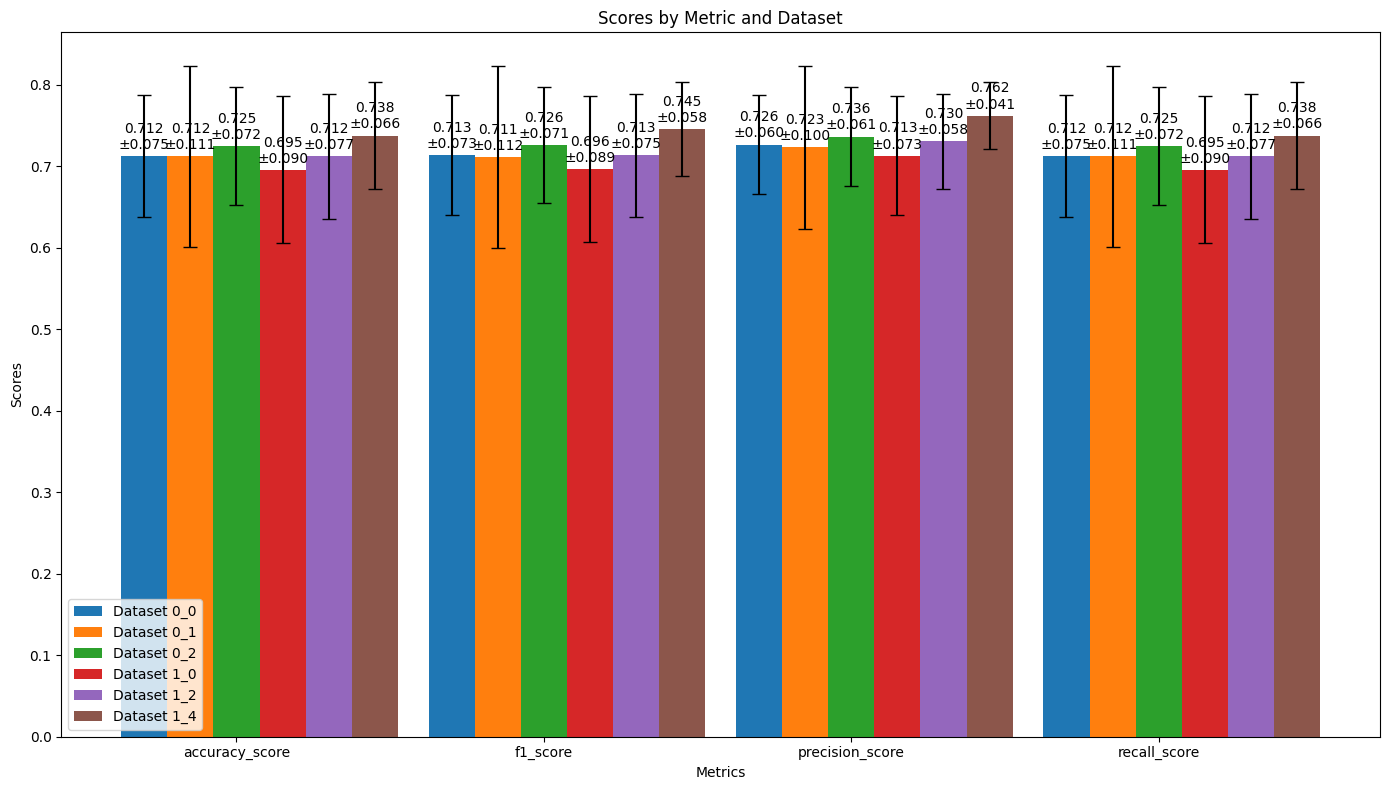

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Dados fornecidos
metrics = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score']

# Prefixo: _0_0
means_0_0 = [0.7119266, 0.7134916, 0.7264055, 0.7119266]
t_interval_0_0 = [0.7867986107146705 - mean for mean in means_0_0]  # Intervalo de confiança superior

# Prefixo: _0_1
means_0_1 = [0.7119266, 0.7113906, 0.7230868, 0.7119266]
t_interval_0_1 = [0.8230731756135495 - mean for mean in means_0_1]

# Prefixo: _0_2
means_0_2 = [0.7247706, 0.726047, 0.7362908, 0.7247706]
t_interval_0_2 = [0.796816262806516 - mean for mean in means_0_2]

# Prefixo: _1_0
means_1_0 = [0.6954128, 0.6964603, 0.7127521, 0.6954128]
t_interval_1_0 = [0.7856857479107415 - mean for mean in means_1_0]

# Prefixo: _1_2
means_1_2 = [0.7119266, 0.7132333, 0.7304289, 0.7119266]
t_interval_1_2 = [0.7885121507242591 - mean for mean in means_1_2]

# Prefixo: _1_4
means_1_4 = [0.7376147, 0.7454999, 0.7618923, 0.7376147]
t_interval_1_4 = [0.8032513630178002 - mean for mean in means_1_4]

# Calcular as barras de erro (usando os intervalos de confiança como erro)
errors_0_0 = t_interval_0_0
errors_0_1 = t_interval_0_1
errors_0_2 = t_interval_0_2
errors_1_0 = t_interval_1_0
errors_1_2 = t_interval_1_2
errors_1_4 = t_interval_1_4

x = np.arange(len(metrics))  # Locais dos rótulos
width = 0.15  # Largura das barras

fig, ax = plt.subplots(figsize=(14, 8))

# Criar as barras para cada conjunto de dados com os intervalos de confiança
rects1 = ax.bar(x - width*2, means_0_0, width, label='Dataset 0_0', yerr=errors_0_0, capsize=5)
rects2 = ax.bar(x - width, means_0_1, width, label='Dataset 0_1', yerr=errors_0_1, capsize=5)
rects3 = ax.bar(x, means_0_2, width, label='Dataset 0_2', yerr=errors_0_2, capsize=5)
rects4 = ax.bar(x + width, means_1_0, width, label='Dataset 1_0', yerr=errors_1_0, capsize=5)
rects5 = ax.bar(x + width*2, means_1_2, width, label='Dataset 1_2', yerr=errors_1_2, capsize=5)
rects6 = ax.bar(x + width*3, means_1_4, width, label='Dataset 1_4', yerr=errors_1_4, capsize=5)

# Adicionar rótulos, título e personalizar rótulos do eixo x, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Scores by Metric and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Função para adicionar os rótulos nas barras, incluindo os valores dos intervalos de confiança
def autolabel(rects, errors):
    for rect, err in zip(rects, errors):
        height = rect.get_height()
        ax.annotate(f'{height:.3f}\n±{err:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adicionar rótulos nas barras com os valores de confiança
autolabel(rects1, errors_0_0)
autolabel(rects2, errors_0_1)
autolabel(rects3, errors_0_2)
autolabel(rects4, errors_1_0)
autolabel(rects5, errors_1_2)
autolabel(rects6, errors_1_4)

fig.tight_layout()

plt.show()
